# AirBnB Seattle Listings

## Business Understanding



AirBnB's Seattle listing data will be evaluated in the following Jupyter file.

The data will be gathered, assessed, cleaned, analyzed, modeled, and visualized.

Additionally, the following questions will be asked in the following order:

1. What months of the year have the highest average listing prices?

2. Which neighborhoods have the highest rating review scores?

3. Which neighborhoods have the highest listing prices?

4. What attributes in the listing data most associate or contribute to prices?

In [358]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.ticker as ticker
from scipy.stats import ks_2samp
import datetime

In [359]:
# Data is gathered for the analysis
seattle_listing = pd.read_csv(r'C:\Users\Tim\OneDrive\Data Science\Udacity\Data Scientist Nanodegree\Data Science Blog Post\AirBnB Seattle Datasets\listings.csv')
calendartable = pd.read_csv(r'C:\Users\Tim\OneDrive\Data Science\Udacity\Data Scientist Nanodegree\Data Science Blog Post\AirBnB Seattle Datasets\calendar.csv')

## Data Understanding

In [360]:
# This code allows all columns in a table to be displayed using .head()
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

# Data is initally assessed (tables like this will be assessed many times throughout the process)
seattle_listing.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/cfe47d69_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a small landscape business. My life revolves around beauty wherever I find it or create it. I grew up in Seattle and love this city for the people, it's natural beauty and don't know anywhere 

## Prepare Data

In [361]:
# Cleaning data - Drops columns that are likely irrelevant to this analysis
# The data will be continuously cleaned throughout process
seattle_listing.drop(['listing_url', 'last_scraped', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 
                      'host_picture_url', 'notes', 'transit', 'space', 'description', 'summary', 'neighborhood_overview', 
                      'host_about', 'street', 'thumbnail_url', 'medium_url', 'scrape_id', 'name', 'latitude', 'longitude', 
                      'is_location_exact', 'square_feet', 'host_acceptance_rate', 'weekly_price', 'monthly_price', 
                      'security_deposit', 'cleaning_fee', 'license'], axis=1, inplace=True)


In [362]:
seattle_listing.head(100)

,id,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,none,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",$85.00,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,none,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials}",$150.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,none,16708587,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),Cat(s),""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}",$975.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,none,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jumio']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo}",$100.00,1,$0.00,1,1125,6 months ago,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,none,1452570,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen A

In [363]:
# Changes data types of id and listing_id columns in their tables
seattle_listing['id']=seattle_listing['id'].astype(str)
calendartable['listing_id']=calendartable['listing_id'].astype(str)


# Renames columns in tables to allow clearer distinctions in analysis
seattle_listing = seattle_listing.rename(columns={"id": "listing_id"})
seattle_listing = seattle_listing.rename(columns={"price": "price_listing"})
calendartable = calendartable.rename(columns={"price": "price_calendar"})


# Drops rows in column where SQ Yards Shipped has missing values
calendartable  = calendartable.dropna(subset=['price_calendar'], axis=0)

seattle_listing.head()

,listing_id,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price_listing,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,none,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",$85.00,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,none,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials}",$150.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,none,16708587,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),Cat(s),""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}",$975.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,none,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jumio']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo}",$100.00,1,$0.00,1,1125,6 months ago,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,none,1452570,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,West Qu

In [364]:
# Joins "seattle_listing" table to "calendartable" using Left Join
ListingAndCalendar = seattle_listing.merge(calendartable, on=['listing_id'], how='left')



ListingAndCalendar.head()

,listing_id,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price_listing,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date,available,price_calendar
0,241032,none,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",$85.00,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-04,t,$85.00
1,241032,none,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",$85.00,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-05,t,$85.00
2,241032,none,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",$85.00,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-13,t,$85.00
3,241032,none,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",$85.00,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-14,t,$85.00
4,241032,none,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",$85.00,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-0

In [365]:
# Creates column that represents dates in the calendartable as months (for a chart further down)
calendartable['MonthYear'] = calendartable.date.astype('datetime64[M]')

In [366]:
# Removes commas and spaces from a price field so that this field can be successfully converted to a float data type
calendartable['price_calendar'] = calendartable['price_calendar'].replace(',', '', regex=True)
calendartable['price_calendar'] = calendartable['price_calendar'].map(lambda x: str(x)[1:])
calendartable['price_calendar'] = calendartable['price_calendar'].str.strip()


calendartable['price_calendar'].to_excel(r'C:\Users\Tim\OneDrive\Data Science\Udacity\Data Scientist Nanodegree\Data Science Blog Post\Python Exports\price.xlsx')

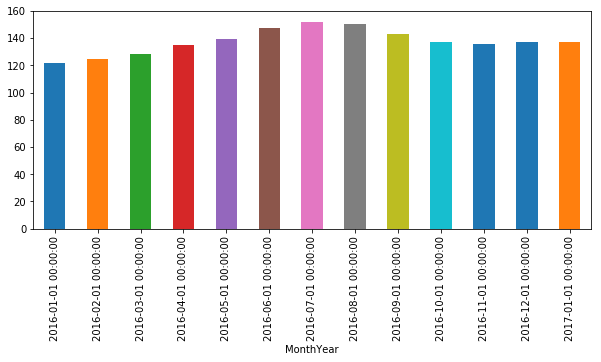

In [367]:
# The processes of analyzing and visualizing data will commence here
# Converts a price field to a float data type
calendartable['price_calendar'] = calendartable['price_calendar'].astype(float)

# Groups a dataframe by "MonthYear" and displays a chart with the means of "price_calendar" per MonthYear
MonthlyPrices = calendartable.groupby('MonthYear')['price_calendar'].mean()
MonthlyPrices.plot.bar(figsize=(10,4))

### What months of the year have the highest average listing prices?

The prices are highest in the summer months—June, July, and August.

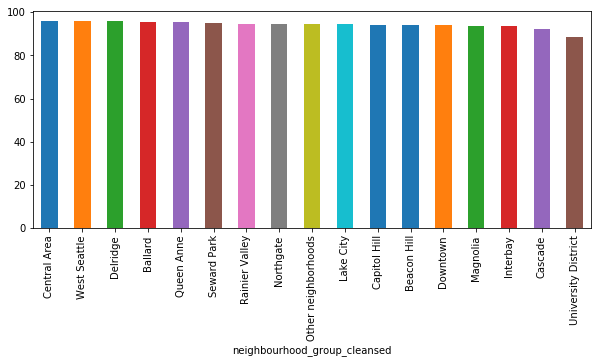

In [368]:
# Groups a dataframe by "neighbourhood_group_cleansed" and displays a chart with the means of "review_scores_rating"
NeighborhoodRating = seattle_listing.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)
NeighborhoodRating.plot.bar(figsize=(10,4))

### Which neighborhoods have the highest rating review scores?

Central Area, West Seattle, and Delridge have the highest review score ratings. However, there isn't much variance in the review score ratings.

In [369]:
# Removes commas and spaces from a price field so that this field can be successfully converted to a float data type
seattle_listing['price_listing'] = seattle_listing['price_listing'].replace(',', '', regex=True)
seattle_listing['price_listing'] = seattle_listing['price_listing'].map(lambda x: str(x)[1:])
seattle_listing['price_listing'] = seattle_listing['price_listing'].str.strip()

seattle_listing['price_listing'].to_excel(r'C:\Users\Tim\OneDrive\Data Science\Udacity\Data Scientist Nanodegree\Data Science Blog Post\Python Exports\price - listing.xlsx')

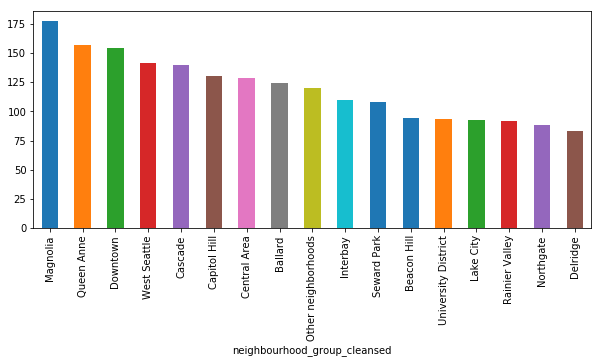

In [370]:
seattle_listing['price_listing'] = seattle_listing['price_listing'].astype(float)

# Groups a dataframe by "neighbourhood_group_cleansed" and displays a chart with the means of "price_listing"
NeighborhoodPrice = seattle_listing.groupby('neighbourhood_group_cleansed')['price_listing'].mean().sort_values(ascending=False)
NeighborhoodPrice.plot.bar(figsize=(10,4))

### Which neighborhoods have the highest listing prices?

Magnolia, Queen Anne, and Downtown have the highest listing prices.

In [371]:
# Creates dataframe displaying where missing values occur
seattle_missing = seattle_listing.isna()
seattle_missing.head()

,listing_id,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price_listing,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [372]:
# Displays number of missing values per column
seattle_num_missing = seattle_missing.sum()
seattle_num_missing

listing_id                          0  
experiences_offered                 0  
host_id                             0  
host_name                           2  
host_since                          2  
host_location                       8  
host_response_time                  523
host_response_rate                  523
host_is_superhost                   2  
host_neighbourhood                  300
host_listings_count                 2  
host_total_listings_count           2  
host_verifications                  0  
host_has_profile_pic                2  
host_identity_verified              2  
neighbourhood                       416
neighbourhood_cleansed              0  
neighbourhood_group_cleansed        0  
city                                0  
state                               0  
zipcode                             7  
market                              0  
smart_location                      0  
country_code                        0  
country                             0  


In [373]:
# Displays percent of missing values per field
seattle_num_missing / len(seattle_listing)

listing_id                          0.000000
experiences_offered                 0.000000
host_id                             0.000000
host_name                           0.000524
host_since                          0.000524
host_location                       0.002095
host_response_time                  0.136983
host_response_rate                  0.136983
host_is_superhost                   0.000524
host_neighbourhood                  0.078575
host_listings_count                 0.000524
host_total_listings_count           0.000524
host_verifications                  0.000000
host_has_profile_pic                0.000524
host_identity_verified              0.000524
neighbourhood                       0.108958
neighbourhood_cleansed              0.000000
neighbourhood_group_cleansed        0.000000
city                                0.000000
state                               0.000000
zipcode                             0.001833
market                              0.000000
smart_loca

In [374]:
# Another way to display percent of missing values per column
seattle_missing.mean()

listing_id                          0.000000
experiences_offered                 0.000000
host_id                             0.000000
host_name                           0.000524
host_since                          0.000524
host_location                       0.002095
host_response_time                  0.136983
host_response_rate                  0.136983
host_is_superhost                   0.000524
host_neighbourhood                  0.078575
host_listings_count                 0.000524
host_total_listings_count           0.000524
host_verifications                  0.000000
host_has_profile_pic                0.000524
host_identity_verified              0.000524
neighbourhood                       0.108958
neighbourhood_cleansed              0.000000
neighbourhood_group_cleansed        0.000000
city                                0.000000
state                               0.000000
zipcode                             0.001833
market                              0.000000
smart_loca

In [375]:
# Creates a dataframe that only shows columns with more than 20% missing values
missing_over_twenty_percent = seattle_missing.mean() > .2
missing_over_twenty_percent = pd.Series(missing_over_twenty_percent)
missing_over_twenty_percent = missing_over_twenty_percent[missing_over_twenty_percent != False]
missing_over_twenty_percent

Series([], dtype: bool)

In [376]:
seattle_listing['host_response_rate'] = seattle_listing['host_response_rate'].replace('%', ' ', regex=True)
seattle_listing['extra_people'] = seattle_listing['extra_people'].map(lambda x: str(x)[1:])


In [377]:
# Renames two columns
seattle_listing.rename(columns={'neighbourhood':'neighbourhood_orig'}, 
                 inplace=True)


# Drops columns that aren't needed for predictions
seattle_listing.drop(['listing_id', 'host_id', 'host_verifications', 'amenities', 'host_since', 'first_review', 'last_review', 
                      'neighbourhood_orig', 'neighbourhood_cleansed', 'host_neighbourhood', 'host_location', 'zipcode', 
                      'smart_location', 'country', 'city', 'experiences_offered', 'calendar_updated', 'state', 'market', 
                      'market', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                      'review_scores_communication', 'review_scores_location', 'review_scores_value', 'host_name',
                     'host_total_listings_count'], axis=1, inplace=True)

In [378]:
# Initializes a min max scaler and applies it to numerical features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['review_scores_rating', 'host_response_rate', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price_listing', 'guests_included', 
             'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
             'availability_365', 'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month']

features_minmax_transform = pd.DataFrame(data = seattle_listing)
features_minmax_transform[numerical] = scaler.fit_transform(seattle_listing[numerical])

# Shows table with min max normalization scaling applied
features_minmax_transform.head(n = 50)

C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,country_code,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price_listing,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,within a few hours,0.951807,f,0.003992,t,t,Queen Anne,US,Apartment,Entire home/apt,0.200000,0.1250,0.142857,0.000000,Real Bed,0.066327,0.133333,0.016667,0.000000,0.00364,t,0.466667,0.683333,0.788889,0.947945,2016-01-04,0.436709,0.9375,f,WASHINGTON,f,moderate,f,f,0.027778,0.333883
1,within an hour,0.975904,t,0.009980,t,t,Queen Anne,US,Apartment,Entire home/apt,0.200000,0.1250,0.142857,0.000000,Real Bed,0.132653,0.066667,0.000000,0.001001,0.00089,t,0.433333,0.216667,0.177778,0.797260,2016-01-04,0.090717,0.9500,f,WASHINGTON,f,strict,t,t,0.138889,0.120363
2,within a few hours,0.602410,f,0.001996,t,t,Queen Anne,US,House,Entire home/apt,0.666667,0.5625,0.714286,0.428571,Real Bed,0.974490,0.666667,0.083333,0.003003,0.00029,t,0.033333,0.100000,0.188889,0.602740,2016-01-04,0.042194,0.9625,f,WASHINGTON,f,strict,f,f,0.027778,0.093157
3,NaN,NaN,f,0.000000,t,t,Queen Anne,US,Apartment,Entire home/apt,0.133333,0.1250,0.000000,0.071429,Real Bed,0.081633,0.066667,0.000000,0.000000,0.01124,t,0.000000,0.000000,0.000000,0.391781,2016-01-04,0.000000,NaN,f,WASHINGTON,f,flexible,f,f,0.000000,NaN
4,within an hour,1.000000,f,0.001996,t,t,Queen Anne,US,House,Entire home/apt,0.333333,0.2500,0.428571,0.142857,Real Bed,0.438776,0.400000,0.050000,0.000000,0.01124,t,1.000000,1.000000,1.000000,1.000000,2016-01-04,0.080169,0.9000,f,WASHINGTON,f,strict,f,f,0.000000,0.071723
5,NaN,NaN,f,0.000000,t,t,Queen Anne,US,House,Private room,0.066667,0.1250,0.142857,0.000000,Real Bed,0.102041,0.066667,0.100000,0.000000,0.00005,t,0.000000,0.000000,0.300000,0.827397,2016-01-04,0.035865,0.9375,f,WASHINGTON,f,strict,f,f,0.000000,0.200330
6,within an hour,1.000000,t,0.000000,t,t,Queen Anne,US,House,Private room,0.066667,0.1250,0.142857,0.000000,Real Bed,0.061224,0.066667,0.033333,0.002002,0.00013,t,0.666667,0.816667,0.788889,0.947945,2016-01-04,0.122363,0.9875,f,WASHINGTON,f,moderate,f,f,0.000000,0.201154
7,within an hour,1.000000,t,0.007984,t,t,Queen Anne,US,Cabin,Private room,0.066667,0.1250,0.142857,0.000000,Real Bed,0.040816,0.066667,0.000000,0.001001,0.00006,t,0.733333,0.700000,0.466667,0.273973,2016-01-04,0.364979,0.9625,f,WASHINGTON,f,strict,t,t,0.111111,0.388293
8,NaN,NaN,f,0.000000,t,t,Queen Anne,US,Apartment,Private room,0.066667,0.1250,0.142857,0.000000,Real Bed,0.071429,0.066667,0.000000,0.002002,0.01124,t,0.200000,0.600000,0.733333,0.934247,2016-01-04,0.016878,0.9625,f,WASHINGTON,f,strict,f,f,0.000000,0.098928
9,within an hour,0.975904,t,0.009980,t,t,Queen Anne,US,Apartment,Entire home/apt,0.200000,0.1250,0.142857,0.000000,Real Bed,0.132653,0.066667,0.000000,0.001001,0.00364,t,0.200000,0.316667,0.544444,0.887671,2016-01-04,0.067511,0.9625,f,WASHINGTON,f,strict,t,t,0.138889,0.126134


In [379]:
# Creates a subset of the dataframe only holding categorical columns
cat_seattle_listing = seattle_listing.select_dtypes(include=['object'])

# Prints how many categorical columns are in the dataframe
cat_seattle_listing.shape[1]

17

In [380]:
# % of rows with null values = 0
np.sum(np.sum(cat_seattle_listing.isnull())/cat_seattle_listing.shape[0] == 0)

12

In [381]:
# % of rows with null values above .5
np.sum(np.sum(cat_seattle_listing.isnull())/cat_seattle_listing.shape[0] > .5)

0

In [382]:
# % of rows with null values above .75
np.sum(np.sum(cat_seattle_listing.isnull())/cat_seattle_listing.shape[0] > .75)

0

In [383]:
# Function for creating dummy variables
cat_cols_lst = cat_seattle_listing.columns

def create_dummy_seattle_listing(seattle_listing, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            seattle_listing = pd.concat([seattle_listing.drop(col, axis=1), pd.get_dummies(seattle_listing[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return seattle_listing

In [384]:
# Pulls a list of the column names containing categorical variables
cat_cols_lst = cat_seattle_listing.columns

# Creates dummy variables
seattle_listing_new = create_dummy_seattle_listing(seattle_listing, cat_cols_lst, dummy_na=True) #Use your newly created function


# Displays number of rows and columns of new dataset with dummy variables
print(seattle_listing_new.shape)

# Drops rows containing misisng values
seattle_listing_new = seattle_listing_new.dropna()

seattle_listing_new.head(20)

(3818, 84)


,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price_listing,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_t,host_identity_verified_nan,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,country_code_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,has_availability_nan,calendar_last_scraped_nan,requires_license_nan,jurisdiction_names_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,0.951807,0.003992,0.200000,0.1250,0.142857,0.000000,0.066327,0.133333,0.016667,0.000000,0.00364,0.466667,0.683333,0.788889,0.947945,0.436709,0.9375,0.027778,0.333883,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.975904,0.009980,0.200000,0.1250,0.142857,0.000000,0.132653,0.066667,0.000000,0.001001,0.00089,0.433333,0.216667,0.177778,0.797260,0.090717,0.9500,0.138889,0.120363,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,0.602410,0.001996,0.666667,0.5625,0.714286,0.428571,0.974490,0.666667,0.083333,0.003003,0.00029,0.033333,0.100000,0.188889,0.602740,0.042194,0.9625,0.027778,0.093157,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.000000,0.001996,0.333333,0.2500,0.428571,0.142857,0.438776,0.400000,0.050000,0.000000,0.01124,1.000000,1.000000,1.000000,1.000000,0.080169,0.9000,0.000000,0.071723,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,1.000000,0.000000,0.066667,0.1250,0.142857,0.000000,0.061224,0.066667,0.033333,0.002002,0.00013,0.666667,0.816667,0.788889,0.947945,0.122363,0.9875,0.000000,0.201154,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,1.000000,0.007984,0.066667,0.1250,0.142857,0.000000,0.040816,0.066667,0.000000,0.001001,0.00006,0.733333,0.700000,0.466667,0.273973,0.364979,0.9625,0.111111,0.388293,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
9,0.975904,0.009980,0.200000,0.1250,0.142857,0.000000,0.132653,0.066667,0.000000,0.001001,0.0036

## Data Modeling

In [385]:
# Fuction for initializing a k-means cluster model (modeling process starts here)
def score(seattle_listing_new, k):
    kmeans_k = KMeans(k)
    model_k = kmeans_k.fit(seattle_listing_new)
    return abs(model_k.score(seattle_listing_new))

In [386]:
# Initliazes a line space with range from 1 to 20
scores = []
centers = np.linspace(1,20,20)
for i in range(1, 21):
    scores.append(score(seattle_listing_new, i))

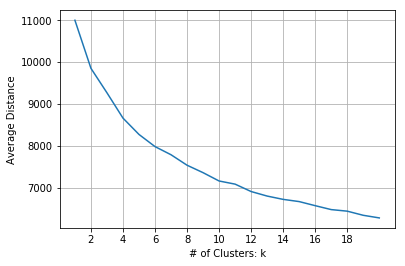

In [387]:
# Investigates the change within-cluster distance across number of clusters
fig, ax = plt.subplots()
ax.plot(centers, scores)
ax.set(ylabel='Average Distance', xlabel='# of Clusters: k')
ax.grid()
plt.xticks(np.arange(2,20,2))
plt.show()

In [401]:
# Re-fits the k-means model with the selected number of clusters
kmeans_k = KMeans(10)
model_k = kmeans_k.fit(seattle_listing_new)
seattle_listing_new_kmeans = model_k.predict(seattle_listing_new)

In [402]:
seattle_listing_new_kmeans

array([2, 5, 4, ..., 1, 4, 9])

## Evaluate the Results

In [403]:
# Creates a new column showing clusters in the dataset used in the model
seattle_listing_new['Clusters'] = pd.Series(seattle_listing_new_kmeans, index=seattle_listing_new.index)



seattle_listing_new.head(20)

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price_listing,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_t,host_identity_verified_nan,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,country_code_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,has_availability_nan,calendar_last_scraped_nan,requires_license_nan,jurisdiction_names_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan,Clusters
0,0.951807,0.003992,0.200000,0.1250,0.142857,0.000000,0.066327,0.133333,0.016667,0.000000,0.00364,0.466667,0.683333,0.788889,0.947945,0.436709,0.9375,0.027778,0.333883,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
1,0.975904,0.009980,0.200000,0.1250,0.142857,0.000000,0.132653,0.066667,0.000000,0.001001,0.00089,0.433333,0.216667,0.177778,0.797260,0.090717,0.9500,0.138889,0.120363,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,5
2,0.602410,0.001996,0.666667,0.5625,0.714286,0.428571,0.974490,0.666667,0.083333,0.003003,0.00029,0.033333,0.100000,0.188889,0.602740,0.042194,0.9625,0.027778,0.093157,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4
4,1.000000,0.001996,0.333333,0.2500,0.428571,0.142857,0.438776,0.400000,0.050000,0.000000,0.01124,1.000000,1.000000,1.000000,1.000000,0.080169,0.9000,0.000000,0.071723,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
6,1.000000,0.000000,0.066667,0.1250,0.142857,0.000000,0.061224,0.066667,0.033333,0.002002,0.00013,0.666667,0.816667,0.788889,0.947945,0.122363,0.9875,0.000000,0.201154,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6
7,1.000000,0.007984,0.066667,0.1250,0.142857,0.000000,0.040816,0.066667,0.000000,0.001001,0.00006,0.733333,0.700000,0.466667,0.273973,0.364979,0.9625,0.111111,0.388293,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,5
9,0.975904,0.009980,0.200000,0.1250,0.142857,0.000000,0.132653,0.066667,0.0

In [404]:
# Groups data by clusters and shows the means of numerical values by cluster
seattle_listing_new_cluster_groups = seattle_listing_new.groupby(['Clusters']).mean()
seattle_listing_new_cluster_groups.head(10)

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price_listing,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_t,host_identity_verified_nan,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,country_code_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,has_availability_nan,calendar_last_scraped_nan,requires_license_nan,jurisdiction_names_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.963214,0.005661,0.157923,0.168289,0.211358,0.058841,0.104659,0.129235,0.045874,0.001001,0.006372,0.773497,0.852596,0.878871,0.818078,0.073079,0.930584,0.033811,0.171330,0.000000,1.000000,0.000000,0.0,0.278689,0.0,1.000000,0.0,0.786885,0.0,0.032787,0.081967,0.000000,0.139344,0.040984,0.000000,0.004098,0.028689,0.012295,0.024590,0.327869,0.069672,0.069672,0.020492,0.016393,0.053279,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.557377,0.000000,0.0,0.000000,0.036885,0.012295,0.946721,0.0,0.0,0.0,0.0,0.0,0.086066,0.0,0.397541,0.307377,0.0,0.016393,0.0,0.036885,0.0
1,0.984167,0.004128,0.161257,0.139725,0.147345,0.055348,0.095480,0.112042,0.037086,0.000728,0.007230,0.595637,0.692147,0.736358,0.689020,0.083030,0.930694,0.047411,0.315958,0.000000,0.000000,0.994764,0.0,0.345550,0.0,1.000000,0.0,0.890052,0.0,0.036649,0.204188,0.015707,0.052356,0.010471,0.204188,0.005236,0.015707,0.005236,0.015707,0.146597,0.083770,0.026178,0.010471,0.010471,0.062827,0.0,0.0,0.010471,0.000000,0.000000,0.020942,0.005236,0.000000,0.015707,0.000000,0.235602,0.015707,0.015707,0.000000,0.026178,0.000000,0.00000,0.0,0.057592,0.026178,0.0,0.000000,0.015707,0.010471,0.968586,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.790576,0.000000,0.0,0.031414,0.0,0.047120,0.0
2,0.926741,0.009396,0.136158,0.140360,0.147700,0.038741,0.096766,0.100282,0.037698,0.005209,0.008289,0.823164,0.868573,0.888606,0.838031,0.055138,0.905032,0.125589,0.157415,0.000000,0.995763,0.000000,0.0,0.182203,0.0,0.995763,0.0,0.762712,0.0,0.000000,0.161017,0.033898,0.067797,0.012712,0.088983,0.004237,0.016949,0.016949,0.025424,0.233051,0.080508,0.046610,0.004237,0.148305,0.016949,0.0,0.0,0.012712,0.004237,0.008475,0.016949,0.004237,0.00000

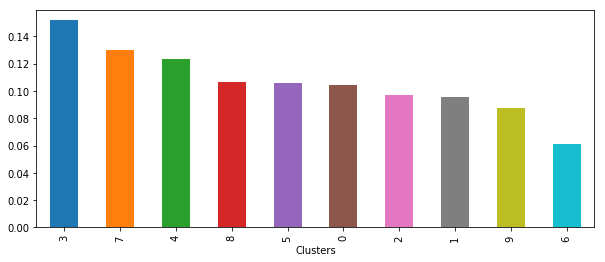

In [405]:
# Displays average prices by cluster
AvgPriceListingPerCluster = seattle_listing_new_cluster_groups['price_listing'].sort_values(ascending=False).head(15)

AvgPriceListingPerCluster.plot.bar(figsize=(10,4))

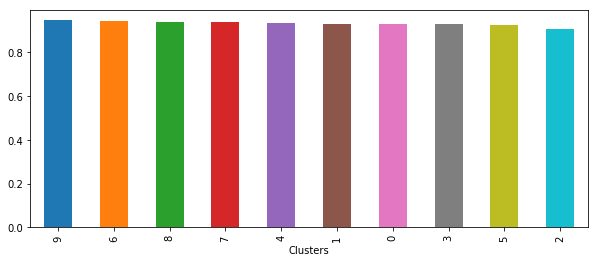

In [406]:
# Displays average review score ratings by cluster--analyzing these ratings isn't helpful due to the lack of variance
AvgScoreListingPerCluster = seattle_listing_new_cluster_groups['review_scores_rating'].sort_values(ascending=False).head(15)

AvgScoreListingPerCluster.plot.bar(figsize=(10,4))

In [407]:
# This code displays differences between numerical values in means across clusters by cluster
seattle_listing_new_mean_array = seattle_listing_new_cluster_groups.mean()
seattle_listing_new_mean_array.head(100)

seattle_listing_new_difference_mean = (seattle_listing_new_cluster_groups - seattle_listing_new_mean_array) / seattle_listing_new_mean_array
seattle_listing_new_difference_mean.head(10)

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price_listing,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_t,host_identity_verified_nan,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,country_code_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,has_availability_nan,calendar_last_scraped_nan,requires_license_nan,jurisdiction_names_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.016263,-0.572129,-0.013930,0.080442,0.173224,0.090036,-0.014717,0.124606,0.210991,-0.322083,-0.120823,0.268101,0.269558,0.245137,0.164544,0.200998,-0.001147,-0.455213,-0.091483,-1.000000,2.430771,-1.000000,NaN,0.085997,NaN,0.001305,NaN,-0.052349,NaN,0.120412,-0.444520,-1.000000,0.408982,1.176755,-1.000000,0.294973,0.879381,-0.138761,0.284393,0.613841,-0.088239,0.692209,0.731213,-0.462630,0.107877,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.463942,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,NaN,1.103075,-1.000000,NaN,-1.000000,0.942404,-0.050075,-0.014507,NaN,NaN,NaN,NaN,NaN,-0.579485,NaN,0.055632,-0.221906,NaN,-0.823326,NaN,-0.669100,NaN
1,0.038371,-0.687996,0.006882,-0.102942,-0.182107,0.025329,-0.101125,-0.025008,-0.021016,-0.506646,-0.002453,-0.023490,0.030641,0.043233,-0.019172,0.364532,-0.001029,-0.236086,0.675435,-1.000000,-1.000000,0.740232,NaN,0.346542,NaN,0.001305,NaN,0.071896,NaN,0.252398,0.383755,-0.193176,-0.470601,-0.443845,0.250393,0.654311,0.028950,-0.633259,-0.179602,-0.278419,0.096247,-0.364184,-0.115359,-0.656758,0.306429,NaN,NaN,0.050547,-1.000000,-1.000000,1.486716,0.243429,-1.0,-0.345267,-1.000000,-0.419490,0.271595,1.348312,-1.0,-0.000484,-1.0,-1.0,NaN,-0.782697,-0.234394,NaN,-1.000000,-0.172868,-0.190989,0.008254,NaN,NaN,NaN,NaN,NaN,3.885988,NaN,1.099299,-1.000000,NaN,-0.661452,NaN,-0.577280,NaN
2,-0.022218,-0.289771,-0.149832,-0.098865,-0.180137,-0.282317,-0.089023,-0.127339,-0.004854,2.527469,0.143593,0.349526,0.293350,0.258930,0.192948,-0.093840,-0.028574,1.023545,-0.165270,-1.000000,2.416234,-1.000000,NaN,-0.289988,NaN,-0.002938,NaN,-0.081461,NaN,-1.000000,0.091188,0.741282,-0.314473,-0.324837,-0.455093,0.338870,0.110336,0.187245,0.327932,0.147126,0.053570,0.132076,-0.642020,3.861379,-0.64

In [408]:
# This code transposes the table above to give a more preferable view of numerical differences from means by cluster
seattle_listing_new_difference_mean_transpose = seattle_listing_new_difference_mean.T
seattle_listing_new_difference_mean_transpose.head(20)

Clusters,0,1,2,3,4,5,6,7,8,9
host_response_rate,0.016263,0.038371,-0.022218,-0.009926,-0.043911,-0.103250,0.037018,0.023410,0.037032,0.027211
host_listings_count,-0.572129,-0.687996,-0.289771,5.283391,-0.737378,-0.520284,-0.696502,-0.124535,-0.787762,-0.867032
accommodates,-0.013930,0.006882,-0.149832,0.294538,0.105222,0.003862,-0.387273,0.389042,0.060065,-0.308577
bathrooms,0.080442,-0.102942,-0.098865,0.022993,0.079315,0.020015,-0.073727,0.154881,0.033755,-0.115868
bedrooms,0.173224,-0.182107,-0.180137,-0.009498,0.191309,0.075698,-0.144024,0.279004,0.102111,-0.305580
beds,0.090036,0.025329,-0.282317,0.294146,0.108816,-0.014291,-0.604268,0.745333,0.098952,-0.461738
price_listing,-0.014717,-0.101125,-0.089023,0.428253,0.158524,-0.004919,-0.425480,0.226586,0.001017,-0.179116
guests_included,0.124606,-0.025008,-0.127339,-0.111734,0.093125,-0.048242,-0.194859,0.351570,0.088983,-0.151102
extra_people,0.210991,-0.021016,-0.004854,-0.048833,0.001536,-0.049416,-0.044819,0.122468,-0.009701,-0.156357
minimum_nights,-0.322083,-0.506646,2.527469,-0.041479,-0.163588,-0.300468,-0.573926,-0.040224,-0.230162,-0.348893


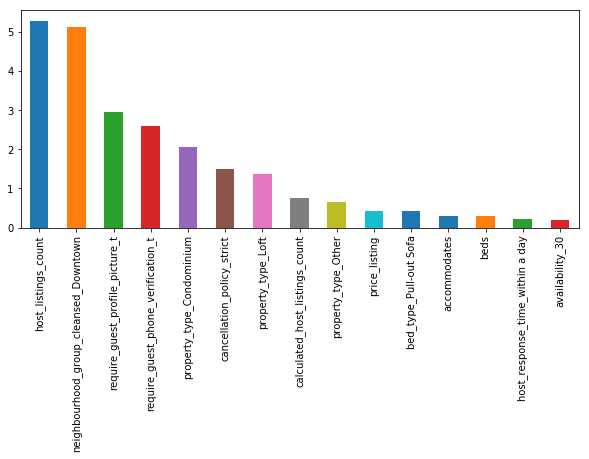

In [418]:
# Displays the attributes with the highest ratios for cluster 3--the cluster with the highest price
Cluster3Sorted = seattle_listing_new_difference_mean_transpose[3].sort_values(ascending=False).head(15)

Cluster3Sorted.plot.bar(figsize=(10,4))

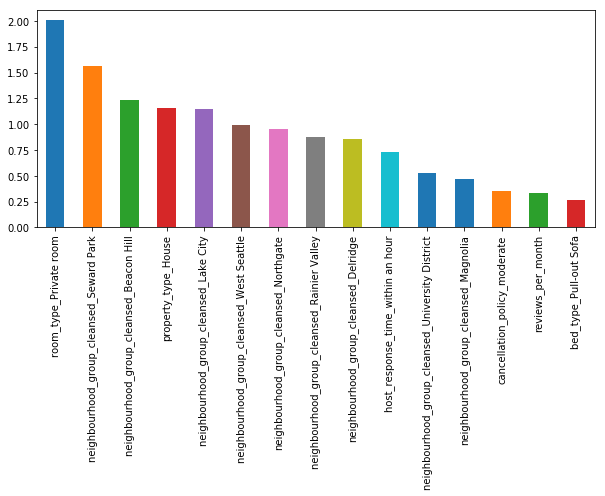

In [419]:
# Displays the attributes with the highest ratios for cluster 6--the cluster with the lowest price
Cluster6Sorted = seattle_listing_new_difference_mean_transpose[6].sort_values(ascending=False).head(15)

Cluster6Sorted.plot.bar(figsize=(10,4))

### Which attributes in the listing data most associate or contribute to prices?

The attributes for the cluster with the highest average price (43% higher than the mean prices across clusters):

•	**Cluster 3**  - host listings count, the downtown neighborhood, require guest profile picture, condominiums, etc.

The attributes for the cluster with the lowest average price  (43% lower than the mean prices across clusters):

•	**Cluster 6** - private room room type, steward park neighborhood, Beacon Hill neighborhood, house property type, etc.

In [420]:
seattle_listing_new_difference_mean_transpose.to_excel(r'C:\Users\Tim\OneDrive\Data Science\Udacity\Data Scientist Nanodegree\Data Science Blog Post\Python Exports\Seattle Listing Cluster Groups (transposed).xlsx')


### References:
•	https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab
